In [1]:
import pandas as pd
%matplotlib inline

# How to use this dataset

## Getting Started

The CSV file for each month contains the scraped data of nearly every train (~99%+) ran on the NJ Transit track system that day, including Amtrak trains which run on the Northeast Corridor. Let's take a look at the file for April 2018:

In [2]:
# use correct path here
df_april = pd.read_csv('/Users/pranav/Documents/development/njtransit/csv/monthly/2018_04.csv', index_col=False)
df_april.head(2)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-04-01,7837,1.0,New York Penn Station,105,New York Penn Station,105,2018-04-01 11:14:00,2018-04-01 11:14:10,0.166667,departed,Northeast Corrdr,NJ Transit
1,2018-04-01,7837,2.0,New York Penn Station,105,Secaucus Upper Lvl,38187,2018-04-01 11:23:00,2018-04-01 11:26:05,3.083333,departed,Northeast Corrdr,NJ Transit


Peeking at the CSV, we see that the first couple of rows have "train_id" #7837 and "date" 2018-04-01. So, let's take a look at the data for train #7837 on April 1, 2018 to get an idea for how to work with this data. The first two rows here will be identical to the cell above:

In [3]:
df_april[(df_april["train_id"] == "7837") & (df_april["date"] == "2018-04-01")]

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-04-01,7837,1.0,New York Penn Station,105,New York Penn Station,105,2018-04-01 11:14:00,2018-04-01 11:14:10,0.166667,departed,Northeast Corrdr,NJ Transit
1,2018-04-01,7837,2.0,New York Penn Station,105,Secaucus Upper Lvl,38187,2018-04-01 11:23:00,2018-04-01 11:26:05,3.083333,departed,Northeast Corrdr,NJ Transit
2,2018-04-01,7837,3.0,Secaucus Upper Lvl,38187,Newark Penn Station,107,2018-04-01 11:32:00,2018-04-01 11:36:07,4.116667,departed,Northeast Corrdr,NJ Transit
3,2018-04-01,7837,4.0,Newark Penn Station,107,Newark Airport,37953,2018-04-01 11:37:00,2018-04-01 11:40:08,3.133333,departed,Northeast Corrdr,NJ Transit
4,2018-04-01,7837,5.0,Newark Airport,37953,Elizabeth,41,2018-04-01 11:42:00,2018-04-01 11:46:04,4.066667,departed,Northeast Corrdr,NJ Transit
5,2018-04-01,7837,6.0,Elizabeth,41,Linden,70,2018-04-01 11:48:00,2018-04-01 11:51:07,3.116667,departed,Northeast Corrdr,NJ Transit
6,2018-04-01,7837,7.0,Linden,70,Rahway,127,2018-04-01 11:52:00,2018-04-01 11:55:08,3.133333,departed,Northeast Corrdr,NJ Transit
7,2018-04-01,7837,8.0,Rahway,127,Metropark,83,2018-04-01 11:57:00,2018-04-01 12:01:08,4.133333,departed,Northeast Corrdr,NJ Transit
8,2018-04-01,7837,9.0,Metropark,83,Metuchen,84,2018-04-01 12:02:00,2018-04-01 12:06:02,4.033333,departed,Northeast Corrdr,NJ Transit
9,2018-04-01,7837,10.0,Metuchen,84,Edison,38,2018-04-01 12:07:00,2018-04-01 12:11:06,4.100000,departed,Northeast Corrdr,NJ Transit


Train #7837 is an NJ Transit train with 14 stops, originating out of New York Penn Station and terminating at Trenton. For a map of the entire NJ Transit system, click [here](https://www.njtransit.com/pdf/rail/Rail_System_Map.pdf).

This specific slice of data represents the trip made by train 7837 on April 1, 2018. Each stop in the train's journey is represented as one row in the data. The first row is `from` New York Penn Station and `to` New York Penn Station; this indicates the train's originating departure from New York Penn Station. The second row is `from` New York Penn Station and `to` Secaucus Upper Lvl; this represents the train's journey from New York Penn Station to Secaucus Upper Lvl.

## Data Dictionary

<table>
    <tr>
        <th>column</th>
        <th>type</th>
        <th>description</th>
    </tr>
    
    <tr>
        <td>train_id</td>
        <td>string</td>
        <td>Train number in the NJT or Amtrak system. These are unique on a daily basis and correspond to the same scheduled train across multiple days. If the train_id contains and "A", it is an Amtrak train.</td>
    </tr>
    
    <tr>
        <td>date</td>
        <td>string</td>
        <td>Date of operation according to the 27-hour NJ Transit schedule. e.g. trains originating between 04/09/18 4:00 to 04/09/18 27:00 (actually 04/10/18 3:00) are considered to run on 04/09/18. </td>
    </tr>
    
    <tr>
        <td>stop_sequence</td>
        <td>int</td>
        <td>Scheduled stop number (e.g. 1st stop, 2nd stop) for the stop in the current row. </td>
    </tr>
    
    <tr>
        <td>from</td>
        <td>string</td>
        <td>Station the train is traveling from for the stop in the current row.</td>
    </tr>
    
    <tr>
        <td>from_id</td>
        <td>int</td>
        <td>Station id for the "from" station. Refer to rail_stations and stops.txt in rail_data/. </td>
    </tr>
    
    <tr>
        <td>to</td>
        <td>string</td>
        <td>Station the train is arriving to for the stop in the current row.</td>
    </tr>
    
    <tr>
        <td>to_id</td>
        <td>int</td>
        <td>Station id for the "to" station. Refer to rail_stations and stops.txt in rail_data/.</td>
    </tr>
    
    <tr>
        <td>scheduled_time</td>
        <td>datetime</td>
        <td>If "type" equals "NJ Transit", the scheduled departure time out of the "to" stop. Else, none.</td>
    </tr>
    
    <tr>
        <td>actual_time</td>
        <td>datetime</td>
        <td>If the status field is "departed", the actual departure time out of the "to" stop. If the status field is "cancelled", the time at which this stop was cancelled. If the status field is "estimated", the estimated departure time out of the "to" stop. </td>
    </tr>
    
    <tr>
        <td>delay_minutes</td>
        <td>decimal</td>
        <td>Only populated when "type" equals "NJ Transit". The difference between actual_time and scheduled_time, in minutes. Pre-cleaned to be > 0 for stops where "actual_time" less than "scheduled_time". </td>
    </tr>
    
    <tr>
        <td>status</td>
        <td>string</td>
        <td>Can take the values "departed", "cancelled", or "estimated". "departed" if stop was explicitly marked departed. "Cancelled" if stop was marked cancelled. None if the stop wasn't explicitly marked departed due to a terminated data stream for the train; estimated times used.</td>
    </tr>
    
    <tr>
        <td>line</td>
        <td>string</td>
        <td>The train line on NJ Transit or Amtrak. See <a href="https://www.njtransit.com/pdf/rail/Rail_System_Map.pdf">here</a> for NJ Transit train lines. All Amtrak lines run on the Northeast Corridor NJ Transit line.</td>
    </tr>
    
    <tr>
        <td>type</td>
        <td>string</td>
        <td>Either "NJ Transit" or "Amtrak"</td>
    </tr>
    
    
        
</table>

## Basic NJ Transit delay analysis

Let's convert the `scheduled_time` and `expected_time` columns to datetimes:

In [4]:
df_april['scheduled_time'] = pd.to_datetime(df_april['scheduled_time'])
df_april['actual_time'] = pd.to_datetime(df_april['actual_time'])

Now, let's try to view cumulative delays for a train. The cumulative delay for a train is simply the "delay" value for the last stop for the train:

In [6]:
cumu_delay = df_april.groupby(['date', 'train_id']).last()

In [7]:
cumu_delay.head(2)

stop_sequence                from  from_id           to  \
date       train_id                                                            
2018-04-01 0041               25.0           Otisville      113  Port Jervis   
           0070               26.0  Secaucus Lower Lvl    38174      Hoboken   

                     to_id      scheduled_time         actual_time  \
date       train_id                                                  
2018-04-01 0041        123 2018-04-02 03:10:00 2018-04-02 03:11:00   
           0070         63 2018-04-01 07:19:00 2018-04-01 07:19:00   

                     delay_minutes     status              line        type  
date       train_id                                                          
2018-04-01 0041                1.0  estimated  Bergen Co. Line   NJ Transit  
           0070                0.0  estimated         Main Line  NJ Transit

Note that all the "status" values are "estimated". This is because we (anecdotally, but repeatedly) noticed that NJ Transit's departure vision does not mark the last station as "departed" in a consistent fashion. However, the latest estimated time for the last station is accurate. For more documentation on the parsing logic used to generate these CSVs, check out the [GitHub repository](https://github.com/pranavbadami/njtransit).

Finally, let's look at the distribution of delays for commuters going into New York Penn Station in April across all NJ Transit trains:

In [8]:
# Get cumulative delay for NJ Transit trains to New York Penn Station
njt_nyp = cumu_delay[(cumu_delay['type'] == "NJ Transit") & (cumu_delay['to'] == "New York Penn Station")]
njt_nyp.head(2)

stop_sequence                from  from_id  \
date       train_id                                               
2018-04-01 3200               17.0  Secaucus Upper Lvl    38187   
           3800               14.0  Secaucus Upper Lvl    38187   

                                        to  to_id      scheduled_time  \
date       train_id                                                     
2018-04-01 3200      New York Penn Station    105 2018-04-02 02:03:00   
           3800      New York Penn Station    105 2018-04-02 02:46:00   

                            actual_time  delay_minutes     status  \
date       train_id                                                 
2018-04-01 3200     2018-04-02 02:02:00            0.0  estimated   
           3800     2018-04-02 02:45:00            0.0  estimated   

                                 line        type  
date       train_id                                
2018-04-01 3200       No Jersey Coast  NJ Transit  
           3800      Northeast Corrdr  NJ Transit

We can do some high level analysis here, such as finding the distribution of cumulative delays for trains that were delayed more than 5 minutes:

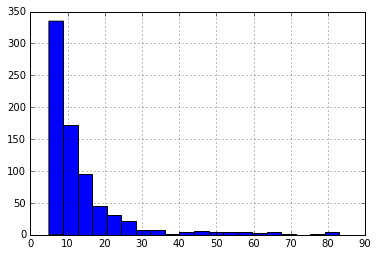

In [9]:
njt_nyp[njt_nyp["delay_minutes"] >= 5]["delay_minutes"].hist(bins=20)

Next, let's take a look at delays for all NJ Transit trains to New York Penn Station on April 2, 2018:

In [10]:
# filter based on the "date" index, which level 0 of the multiindex
njt_nyp_0402 = njt_nyp.loc[njt_nyp.index.get_level_values(0) == "2018-04-02"]
njt_nyp_0402.head(2)

stop_sequence                 from  from_id  \
date       train_id                                                
2018-04-02 3124                6.0  Newark Penn Station      107   
           3126                8.0   Secaucus Upper Lvl    38187   

                                        to  to_id      scheduled_time  \
date       train_id                                                     
2018-04-02 3124      New York Penn Station    105 2018-04-02 08:09:00   
           3126      New York Penn Station    105 2018-04-02 08:32:00   

                            actual_time  delay_minutes     status  \
date       train_id                                                 
2018-04-02 3124     2018-04-02 08:24:00           15.0  estimated   
           3126     2018-04-02 08:47:00           15.0  estimated   

                                 line        type  
date       train_id                                
2018-04-02 3124      Northeast Corrdr  NJ Transit  
           3126      Northeast Corrdr  NJ Transit

We can plot the delay of trains vs when they were scheduled to arrive at New York Penn Station. This gives us a sense of overall train behavior into New York Penn Station, a major station, on April 2; delays are particularly severe by the end of the morning rush hour (~9 am).

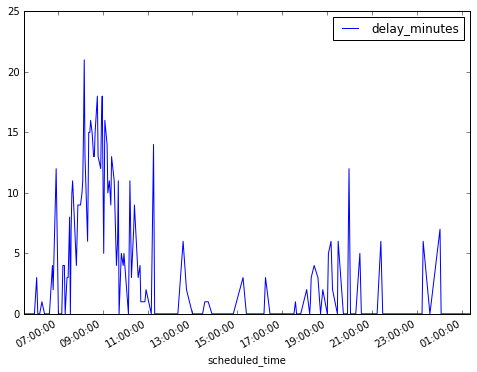

In [11]:
njt_nyp_0402.plot(x="scheduled_time", y="delay_minutes", figsize=(8,6))

## Amtrak Trains

This dataset also contains observed performance data for the various Amtrak lines that run on the Northeast Corridor tracks.

In [12]:
amtrak = df_april[df_april["type"] == "Amtrak"]
amtrak.head(2)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
102,2018-04-01,A2205,NaN,New York Penn Station,105,New York Penn Station,105,NaT,2018-04-01 09:01:01,NaN,departed,Amtrak,Amtrak
103,2018-04-01,A2205,NaN,New York Penn Station,105,Newark Penn Station,107,NaT,2018-04-01 09:16:01,NaN,departed,Amtrak,Amtrak


Let's take a look at Amtrak train A2205 on April 1, 2018:

In [13]:
amtrak[(amtrak['train_id'] == "A2205") & (amtrak['date'] == '2018-04-01')]

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
102,2018-04-01,A2205,NaN,New York Penn Station,105,New York Penn Station,105,NaT,2018-04-01 09:01:01,NaN,departed,Amtrak,Amtrak
103,2018-04-01,A2205,NaN,New York Penn Station,105,Newark Penn Station,107,NaT,2018-04-01 09:16:01,NaN,departed,Amtrak,Amtrak
104,2018-04-01,A2205,NaN,Newark Penn Station,107,Metropark,83,NaT,2018-04-01 09:30:10,NaN,departed,Amtrak,Amtrak
105,2018-04-01,A2205,NaN,Metropark,83,Philadelphia,1,NaT,2018-04-01 10:09:05,NaN,departed,Amtrak,Amtrak


Note that there are NaN values here in the "scheduled_time" column. This is because Amtrak schedule data has not (yet, see [issues](https://github.com/pranavbadami/njtransit/issues)) been incorporated into the dataset. The "delay_minutes" column also contains NaNs since it is derived using "scheduled_time". 

While we cannot calculate delay statistics for Amtrak (yet), we can still capture the rail network traffic caused by these trains. For example, we can look at the total trip times for Amtrak trains:

In [14]:
# get first and last stops for Amtrak trains
amtrak_first = amtrak.groupby(['date', 'train_id']).first()
amtrak_last = amtrak.groupby(['date', 'train_id']).last()

# calculate total trip times for Amtrak trains
amtrak_trip_times = amtrak_last["actual_time"] - amtrak_first["actual_time"]
amtrak_trip_times.head()

date        train_id
2018-04-01  A123       01:50:56
            A126       01:25:55
            A132       02:33:02
            A135       01:11:02
            A139       01:46:02
Name: actual_time, dtype: timedelta64[ns]

Amtrak cancellations may also be of interest:

In [15]:
amtrak[amtrak["status"] == "cancelled"].head(5)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
24057,2018-04-03,A42,NaN,Philadelphia,1,Trenton,148,NaT,2018-04-03 15:26:01,NaN,cancelled,PENNSYLVANIAN,Amtrak
24740,2018-04-03,A43,NaN,New York Penn Station,105,New York Penn Station,105,NaT,2018-04-03 10:22:07,NaN,cancelled,PENNSYLVANIAN,Amtrak
24741,2018-04-03,A43,NaN,New York Penn Station,105,Newark Penn Station,107,NaT,2018-04-03 10:22:07,NaN,cancelled,PENNSYLVANIAN,Amtrak
24742,2018-04-03,A43,NaN,Newark Penn Station,107,Trenton,148,NaT,2018-04-03 10:22:07,NaN,cancelled,PENNSYLVANIAN,Amtrak
34476,2018-04-04,A647,NaN,New York Penn Station,105,New York Penn Station,105,NaT,2018-04-04 13:41:07,NaN,cancelled,KEYSTONE,Amtrak
